## Explore In state and Out state Tuition & Fee

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from tools.utils import combine_columns, compute_feature_importance, standard_units

In [9]:
# data only with tuition fee of in state and out state, four-year institutions and less than four-year institutions
tuition_data = data[['RET_FT4', 'RET_FTL4', 'TUITIONFEE_IN','TUITIONFEE_OUT']]
tuition_data.head()

,RET_FT4,RET_FTL4,TUITIONFEE_IN,TUITIONFEE_OUT
0,0.5403,NaN,10024.0,18634.0
1,0.8640,NaN,8568.0,20400.0
2,0.5000,NaN,6950.0,6950.0
3,0.8180,NaN,11338.0,23734.0
4,0.6202,NaN,11068.0,19396.0


First, we can take a look at what difference in the distribution between in-state and out-state tuition.

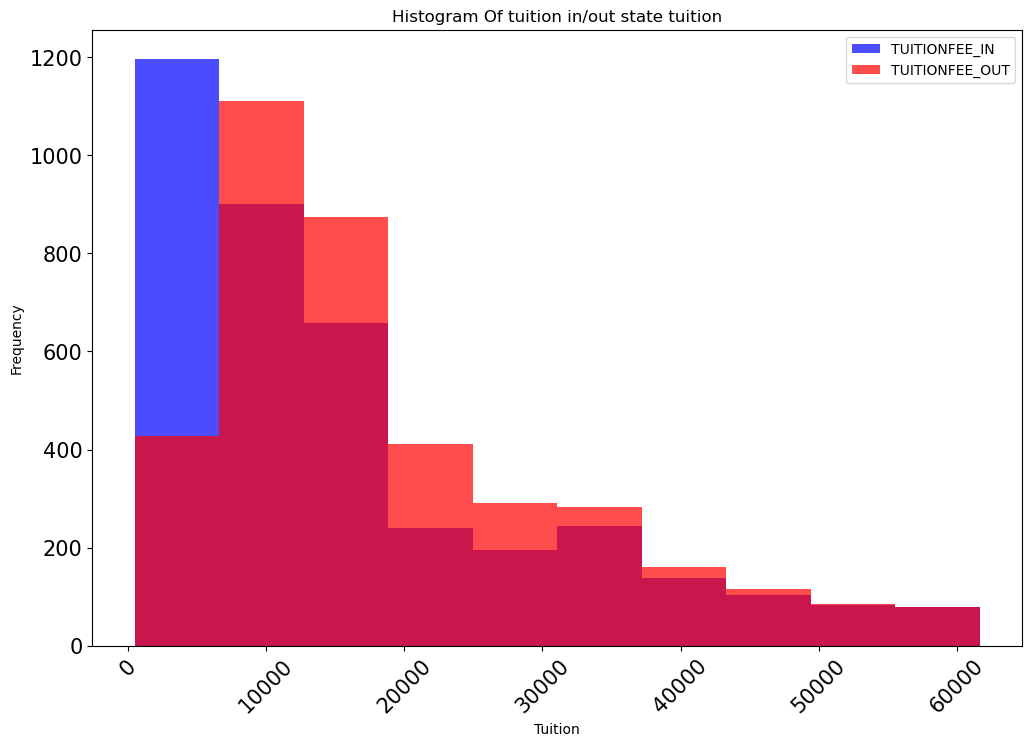

In [10]:
tuition_data_inout = tuition_data[['TUITIONFEE_IN','TUITIONFEE_OUT']]
tuition_data_inout.plot(kind='hist',
        alpha=0.7,
        title='Histogram Of tuition in/out state tuition',
        rot=45,
        figsize=(12,8),
        fontsize=15, 
        color=['blue', 'r'])
plt.xlabel('Tuition');

plt.savefig('figures/in_out_tuition.png')
plt.show()

From the Histogram above, in state more concentrated in the low cost segment. And more people are out of state than in state in every range except 0 to 5,000. It can be seen that students out of state need to pay more fees than those in state. The same conclusion can be found when we directly compare the mean and median of students in state and out state, that is, both the mean and median of students in out state are higher than those in state.

After looking at the difference in distribution between in state tuition & fee and out state tuition & fee, we can analysis them combine with retention rate. Now take a look at if in/out state tuition&fee affect retention rate.

In [11]:
in_FT4 = data[['RET_FT4', 'TUITIONFEE_IN']]
in_FTL4 = data[['RET_FTL4', 'TUITIONFEE_IN']]
out_FT4 = data[['RET_FT4', 'TUITIONFEE_OUT']]
out_FTL4 = data[['RET_FTL4', 'TUITIONFEE_OUT']]

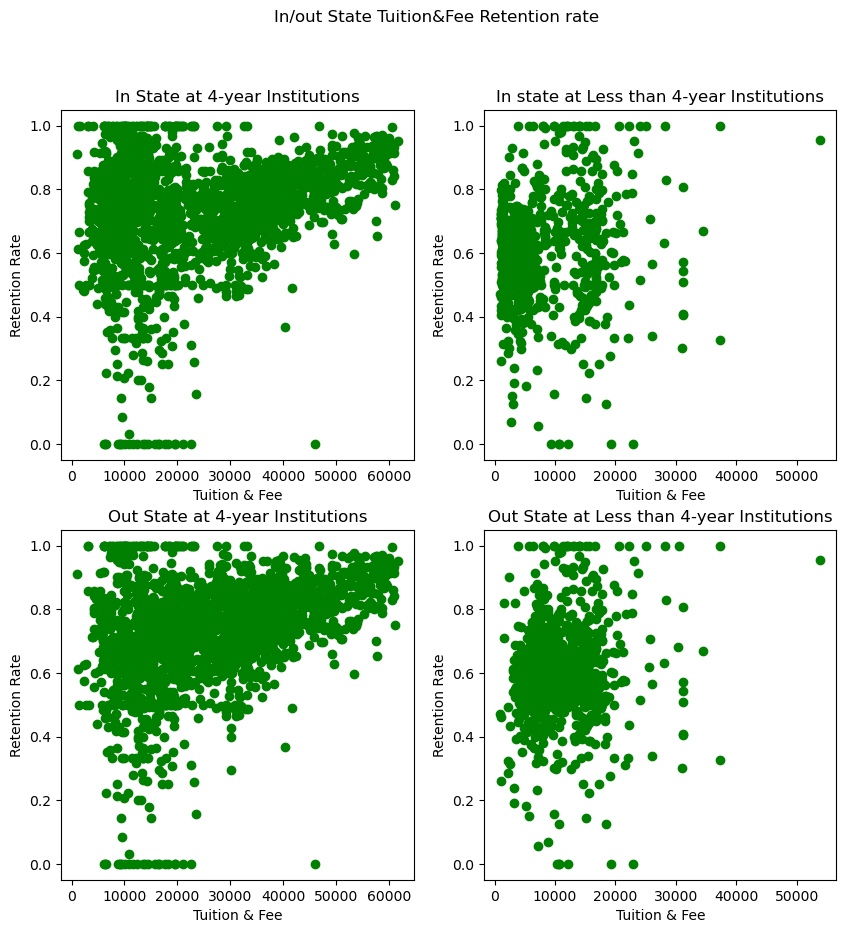

In [12]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(10,10))
fig.suptitle('In/out State Tuition&Fee Retention rate')

# make a graph for in state tuition & fee and 4 year institutions
ax1.set_title('In State at 4-year Institutions')
ax1.set_xlabel('Tuition & Fee')
ax1.set_ylabel('Retention Rate')
ax1.scatter(in_FT4.TUITIONFEE_IN, in_FT4.RET_FT4,color ='green')

# make a graph for in state tuition & fee and less than 4 year institutions
ax2.set_title('In state at Less than 4-year Institutions')
ax2.set_xlabel('Tuition & Fee')
ax2.set_ylabel('Retention Rate')
ax2.scatter(in_FTL4.TUITIONFEE_IN, in_FTL4.RET_FTL4,color ='green')

# make a graph for out state tuition & fee and 4 year institutions
ax3.set_title('Out State at 4-year Institutions')
ax3.set_xlabel('Tuition & Fee')
ax3.set_ylabel('Retention Rate')
ax3.scatter(out_FT4.TUITIONFEE_OUT, out_FT4.RET_FT4,color ='green')

# make a graph for out state tuition & fee and less than 4 year institutions
ax4.set_title('Out State at Less than 4-year Institutions')
ax4.set_xlabel('Tuition & Fee')
ax4.set_ylabel('Retention Rate')
ax4.scatter(out_FTL4.TUITIONFEE_OUT, out_FTL4.RET_FTL4,color ='green')

plt.savefig('figures/retention_in_out_tuition.png')
plt.show()

We use the correlation coefficient(r) measures the strength of the linear relationship between two variables. Graphically, it measures how clustered the scatter diagram is around a straight line.

In [13]:
standard_tuition_data = tuition_data.assign(standard_RET_FT4=standard_units(tuition_data.RET_FT4),
                       standard_RET_FTL4=standard_units(tuition_data.RET_FTL4),
                       standard_TUI_IN=standard_units(tuition_data.TUITIONFEE_IN),
                       standard_TUI_OUT=standard_units(tuition_data.TUITIONFEE_OUT))
standard_tuition_data.head()

,RET_FT4,RET_FTL4,TUITIONFEE_IN,TUITIONFEE_OUT,standard_RET_FT4,standard_RET_FTL4,standard_TUI_IN,standard_TUI_OUT
0,0.5403,NaN,10024.0,18634.0,-1.139438,NaN,-0.422876,-0.038961
1,0.8640,NaN,8568.0,20400.0,0.794970,NaN,-0.526098,0.095119
2,0.5000,NaN,6950.0,6950.0,-1.380268,NaN,-0.640805,-0.926044
3,0.8180,NaN,11338.0,23734.0,0.520077,NaN,-0.329721,0.348246
4,0.6202,NaN,11068.0,19396.0,-0.661961,NaN,-0.348862,0.018892


In [14]:
# the correlation coefficient(r) of 4-year instituion with in-state tuition
r_4_in_state = np.mean(standard_tuition_data.standard_RET_FT4 * standard_tuition_data.standard_TUI_IN)
# the correlation coefficient(r) of 4-year instituion with out-state tuition
r_4_out_state = np.mean(standard_tuition_data.standard_RET_FT4 * standard_tuition_data.standard_TUI_OUT)
# the correlation coefficient(r) of less than 4-year instituion with in-state tuition
r_less_4_in_state = np.mean(standard_tuition_data.standard_RET_FTL4 * standard_tuition_data.standard_TUI_IN)
# the correlation coefficient(r) of less than 4-year instituion with out-state tuition
r_less_4_out_state = np.mean(standard_tuition_data.standard_RET_FTL4 * standard_tuition_data.standard_TUI_OUT)

print("The correlation coefficient of 4-year instution for in-state tuition & fee is " + str(r_4_in_state)+".")
print("The correlation coefficient of 4-year instution for out-state tuition & fee is " + str(r_4_out_state)+ ".")
print("The correlation coefficient of less than 4-year instution for in-state tuition & fee is "+ str(r_less_4_in_state)+".")
print("The correlation coefficient of less than 4-year instution for out-state tuition & fee is "+ str(r_less_4_out_state)+".")

The correlation coefficient of 4-year instution for in-state tuition & fee is 0.27829321886510244.
The correlation coefficient of 4-year instution for out-state tuition & fee is 0.3726884580745627.
The correlation coefficient of less than 4-year instution for in-state tuition & fee is 0.32978043799834184.
The correlation coefficient of less than 4-year instution for out-state tuition & fee is 0.3277732356542793.


**Based on the correlation coefficient, there is a weak relationship between in/out-state tuition&fee with retention rate at either four-year and less-than-four-year institutions.**